<a href="https://colab.research.google.com/github/czapata-ande/ai-frameworks/blob/main/Cuaderno_CancerMama_KerasTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación del cáncer de mama con Keras y TensorFlow

## 2. PREPROCESAMIENTO

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar datos
url = "https://raw.githubusercontent.com/vneumannufprbr/TrabajosRStudio/main/CancerdeMamaDatos.csv"
data = pd.read_csv(url)
data.drop(columns=["Id"], inplace=True)

# Imputar valores faltantes solo en columnas numéricas
data[data.select_dtypes(include='number').columns] = data.select_dtypes(include='number').fillna(data.select_dtypes(include='number').mean())

# Codificar variable objetivo
le = LabelEncoder()
data["Class"] = le.fit_transform(data["Class"])

# Separar características y etiquetas
X = data.drop("Class", axis=1)
y = data["Class"]

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1912)


## 3. CONSTRUCCIÓN DEL MODELO

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Modelo secuencial
model = Sequential([
    Dense(10, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4. COMPILACIÓN DEL MODELO

In [4]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


## 5. ENTRENAMIENTO DEL MODELO

In [5]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.1)


## 6. EVALUACIÓN DEL MODELO

In [6]:
from sklearn.metrics import accuracy_score, cohen_kappa_score

# Predicciones
y_pred_prob = model.predict(X_test)
y_pred_classes = (y_pred_prob > 0.5).astype("int32").flatten()

# Métricas
accuracy = accuracy_score(y_test, y_pred_classes)
kappa = cohen_kappa_score(y_test, y_pred_classes)

print(f'Accuracy: {accuracy:.4f}')
print(f'Kappa: {kappa:.4f}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Accuracy: 0.9714
Kappa: 0.9337


## 7. MATRIZ DE CONFUSIÓN

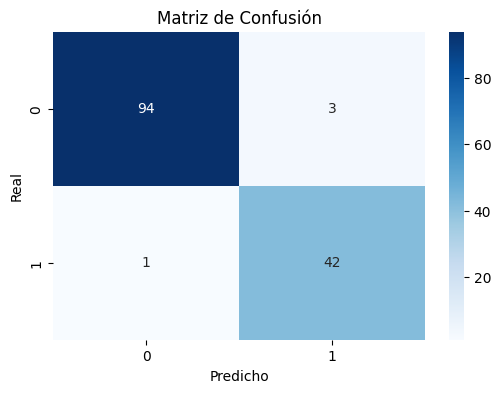

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()
